# Customer Personality Analysis with Python


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers. In this article, I’m going to introduce you to a data science project on customer personality analysis with Python.

Attributes

People

1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. omplain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years

Promotion

17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive\marketing_campaign.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.shape

(2240, 29)

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Dt_Customer'] = df['Dt_Customer'].str.replace('-', '/')

In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

# 1. Basic Customer Distribution For Analysis

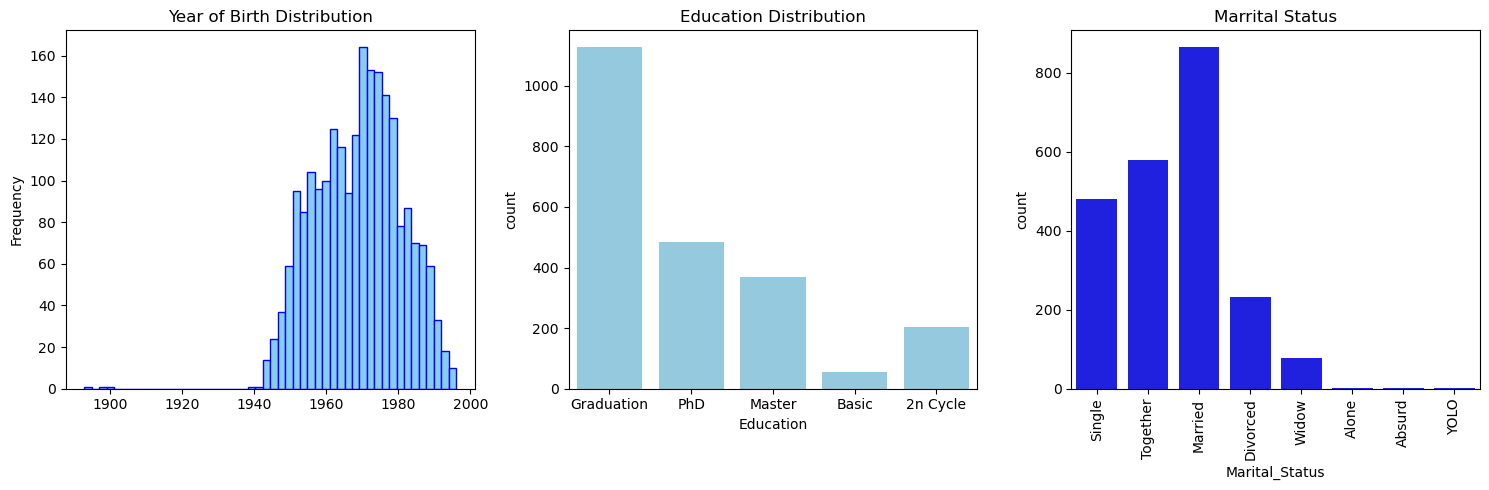

In [10]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#1 -> x axis, 2 -> y axis

# Plot the histogram on the first subplot
df['Year_Birth'].plot(kind='hist', bins=50, edgecolor='blue', color='skyblue', ax=axs[0])
axs[0].set_title('Year of Birth Distribution')

# Plot the countplot on the second subplot
sns.countplot(data=df, x='Education', color='skyblue', ax=axs[1])
axs[1].set_title('Education Distribution')

sns.countplot(data = df, x = 'Marital_Status', ax = axs[2], color = 'blue')
axs[2].set_title('Marrital Status')
plt.xticks(rotation = 90)

# Adjust layout
plt.tight_layout()

# 2. Age Density

In [11]:
df["Dt_Customer"] = df["Dt_Customer"].apply(
    pd.to_datetime, dayfirst=True, errors="coerce"
)
df["Dt_Customer"].agg(["min", "max"])

min   2012-07-30
max   2014-06-29
Name: Dt_Customer, dtype: datetime64[ns]

In [12]:
df['Age'] = 2014 - df['Year_Birth']

In [13]:
df.Age.mean()

45.19419642857143

Text(0.5, 1.0, 'Age Density')

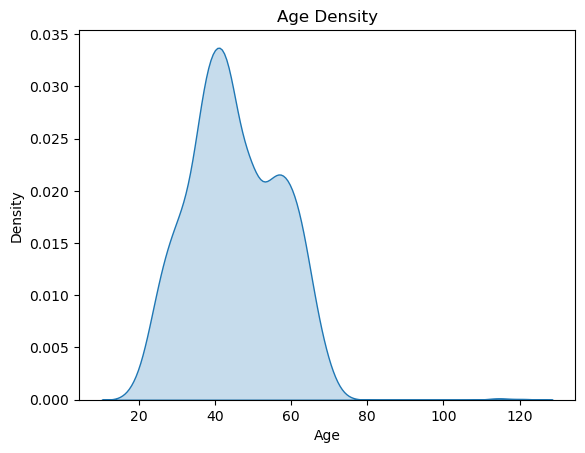

In [14]:
ax = plt.axes()
sns.kdeplot(data = df, x = 'Age', fill = True, ax=ax)
ax.set_title('Age Density')

Conclusion: 

1. Most of the customers are between the age of 18 and 80
2. 45 is the average age among all customers

In [15]:
def is_parent(row):
    if row['Kidhome'] == 1 or row['Teenhome'] == 1:
        return 1
    else:
        return 0
df['is_parents'] = df.apply(is_parent, axis = 1)

In [16]:
parent_count = pd.DataFrame(df.groupby('Education')['is_parents'].value_counts())

In [17]:
parent_count

count
Education  is_parents       
2n Cycle   1             138
           0              65
Basic      1              37
           0              17
Graduation 1             784
           0             343
Master     1             258
           0             112
PhD        1             338
           0             148

<Axes: xlabel='Education', ylabel='count'>

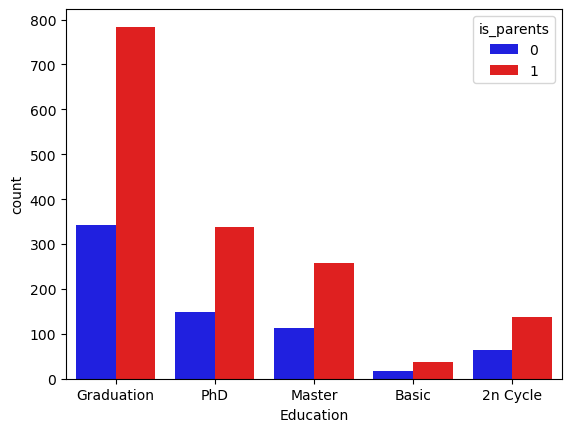

In [18]:
sns.countplot(data = df, x = 'Education', hue = 'is_parents', palette = ['Blue', 'Red'])

Most of the customers are parents

# 3. Income Distribution

In [19]:
df.Income.mean()

52247.25135379061

In [20]:
df['Income'].min()

1730.0

In [21]:
df.Income.max()

666666.0

<Axes: ylabel='Frequency'>

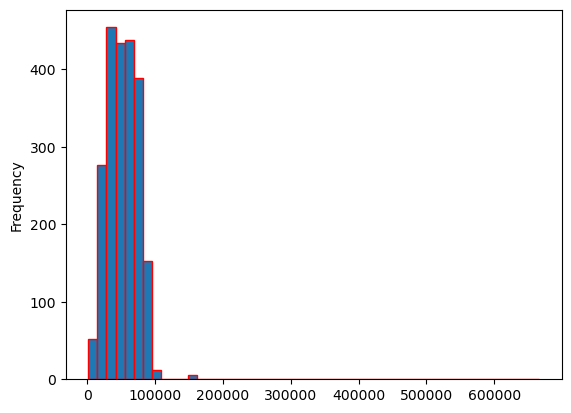

In [22]:
df['Income'].plot(kind = 'hist', bins = 50, edgecolor = 'red')

The Avgerage Salary of customers is 52247

# 4. Amount spent on Products

In [23]:
df['Amt_spent'] = df['MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds'.split()].sum(axis = 1)

In [24]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,is_parents,Amt_spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,57,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,60,1,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,30,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,47,1,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,68,1,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,33,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,58,1,843


Total amaount spent on each products :- 

In [25]:
data = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meats': df['MntMeatProducts'].sum(),
    'Fish': df['MntFishProducts'].sum(),
    'Sweet': df['MntSweetProducts'].sum(),
    'Gold': df['MntGoldProds'].sum()
}

# Create a DataFrame with a single row
product = pd.DataFrame([data])

# Transpose the DataFrame to make it vertical
product_vertical = product.T
product_vertical.columns = ['Total']

In [26]:
product_vertical

,Total
Wines,680816
Fruits,58917
Meats,373968
Fish,84057
Sweet,60621
Gold,98609


Text(0.5, 1.0, 'Amount spent vs Income')

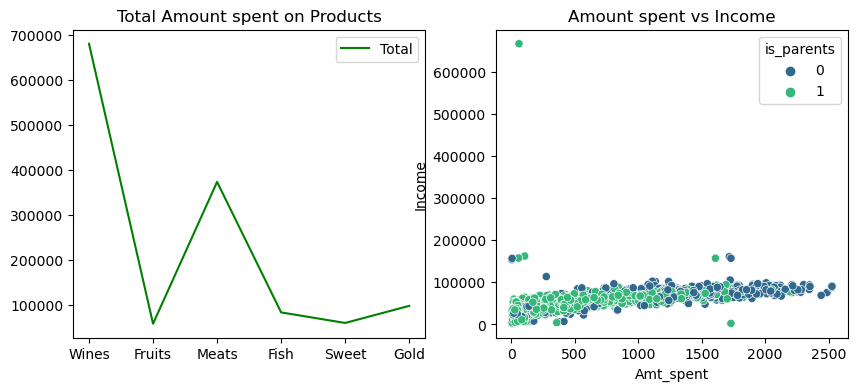

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))
product_vertical.plot(kind = 'line', color = 'green', ax = axs[0])
axs[0].set_title('Total Amount spent on Products')

sns.scatterplot(data = df, x = 'Amt_spent', y = 'Income', palette="viridis", hue = 'is_parents', ax=axs[1])
axs[1].set_title('Amount spent vs Income')

In [28]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [29]:
most_spent_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].idxmax(axis=1)
df['MostSpentProduct'] = most_spent_product
df[['Spent','MostSpentProduct']]

,Spent,MostSpentProduct
0,1617,MntWines
1,27,MntWines
2,776,MntWines
3,53,MntMeatProducts
4,422,MntWines
...,...,...
2235,1341,MntWines
2236,444,MntWines
2237,1241,MntWines
2238,843,MntWines


In [30]:
most_spent_product.value_counts()

MntWines            1539
MntMeatProducts      443
MntGoldProds         168
MntFishProducts       59
MntSweetProducts      16
MntFruits             15
Name: count, dtype: int64

In [31]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['Teen', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,is_parents,Amt_spent,Spent,MostSpentProduct,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57,0,1617,1617,MntWines,50-59
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60,1,27,27,MntWines,60+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49,0,776,776,MntWines,40-49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,30,1,53,53,MntMeatProducts,30-39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33,1,422,422,MntWines,30-39


Average amount spent on each products :-

In [32]:
averages = [df['MntWines'].mean(),
df['MntFruits'].mean(),
df['MntMeatProducts'].mean(),
df['MntFishProducts'].mean(),
df['MntSweetProducts'].mean(),
df['MntGoldProds'].mean()]

product_averages = pd.DataFrame(averages, index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'])

In [33]:
product_averages = product_averages.rename(columns = {0 : 'Mean'})

In [34]:
product_averages

,Mean
Wines,303.935714
Fruits,26.302232
Meat,166.950000
Fish,37.525446
Sweet,27.062946
Gold,44.021875


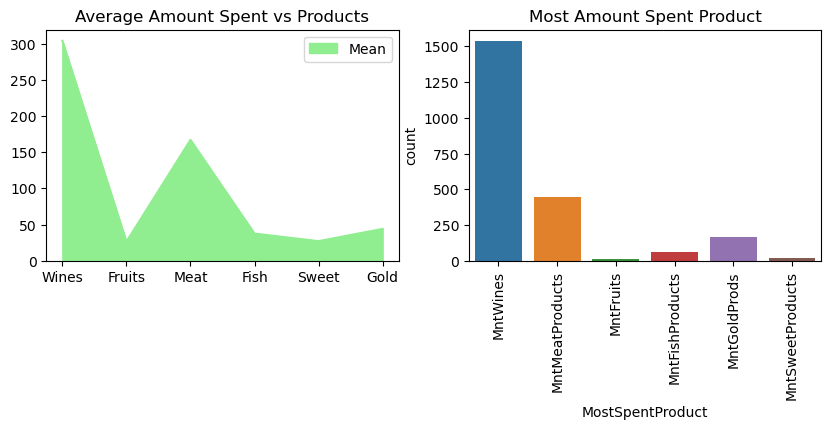

In [35]:
fig, axs = plt.subplots(1, 2, figsize = (10, 3))

product_averages.plot(kind = 'area', color = 'lightgreen', ax = axs[0])
axs[0].set_title('Average Amount Spent vs Products')

sns.countplot(data = df, x = 'MostSpentProduct', ax = axs[1])
axs[1].set_title('Most Amount Spent Product')
plt.xticks(rotation = 90)
plt.show()

# Data Preprocessing

In [104]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive\marketing_campaign.csv")
df["Dt_Customer"] = df["Dt_Customer"].apply(
    pd.to_datetime, dayfirst=True, errors="coerce"
)

In [105]:
df['last_day']=pd.to_datetime('2014-12-06')
df['No_Days']=(df['last_day']-df['Dt_Customer']).dt.days

In [106]:
df['relationship']=df['Marital_Status'].replace({'Married':'in_relationship' , 'Together':'in_relationship' , 'Single':'single' , 'Divorced':'single',
                                                    'YOLO':'single' , 'Absurd':'single' , 'Widow':'single' ,'Alone':'single'})

In [107]:
df['members_home']=df['Kidhome']+df['Teenhome']+df['relationship'].replace({'single':0,'in_relationship':1})
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']
+ df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Length: 2240, dtype: int64

In [108]:
df['num_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] 
+ df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

0       348
1         9
2       174
3        18
4        88
       ... 
2235    407
2236      8
2237     68
2238    171
2239     24
Length: 2240, dtype: int64

In [109]:
df.drop(labels=['Marital_Status','ID','last_day','Year_Birth'
                  ,'Dt_Customer','last_day', 'Kidhome','Teenhome',
                  'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2','Z_CostContact', 'Z_Revenue',"Recency", "Complain"], axis=1, inplace=True)

In [110]:
df.columns

Index(['Education', 'Income', 'Response', 'No_Days', 'relationship',
       'members_home', 'AcceptedCmp', 'num_purchases', 'expenses'],
      dtype='object')

In [111]:
df['Education']=  preprocessing.LabelEncoder().fit_transform(df['Education'])
df['relationship']=  preprocessing.LabelEncoder().fit_transform(df['relationship'])

In [112]:
df.head()

,Education,Income,Response,No_Days,relationship,members_home,AcceptedCmp,num_purchases,expenses
0,2,58138.0,1,823,1,0,0,25,1269
1,2,46344.0,0,273,1,2,0,6,18
2,2,71613.0,0,472,0,1,0,21,602
3,2,26646.0,0,299,0,2,0,8,35
4,4,58293.0,0,321,0,2,0,19,334


In [113]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(df.values)
scaled_data = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [114]:
scaled_data.shape

(2240, 9)

In [55]:
X_cleaned = scaled_data.dropna()

In [115]:
pca = PCA(n_components=4)
data_pca = pca.fit_transform(X_cleaned)

In [116]:
data_pca.shape

(2216, 4)

In [117]:
df.shape

(2240, 9)

# Clustering

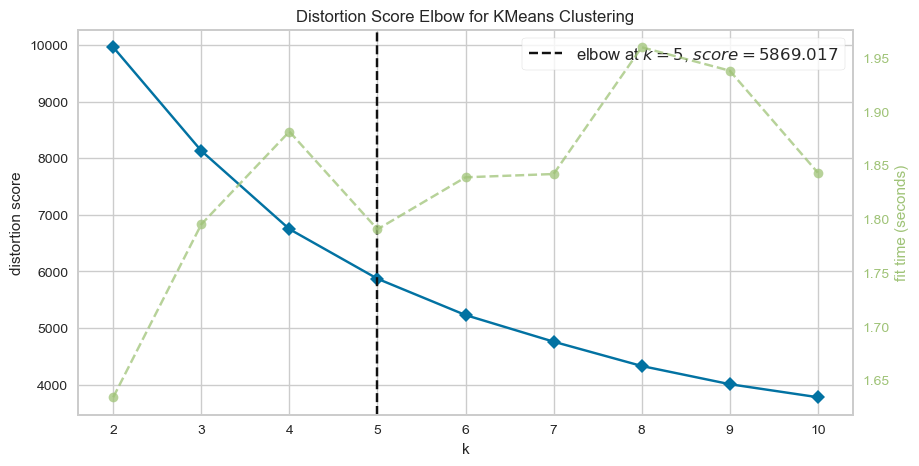

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
plt.figure(figsize=(10, 5))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data_pca)
elbow_graph.show()

In [86]:
kmeans = KMeans(n_clusters =5 )
cluster = kmeans.fit_predict(data_pca)

In [88]:
cluster.min(),cluster.max()

(0, 4)

In [89]:
cluster

array([3, 4, 0, ..., 3, 0, 1])

Text(0.5, 1.0, 'clusters in data')

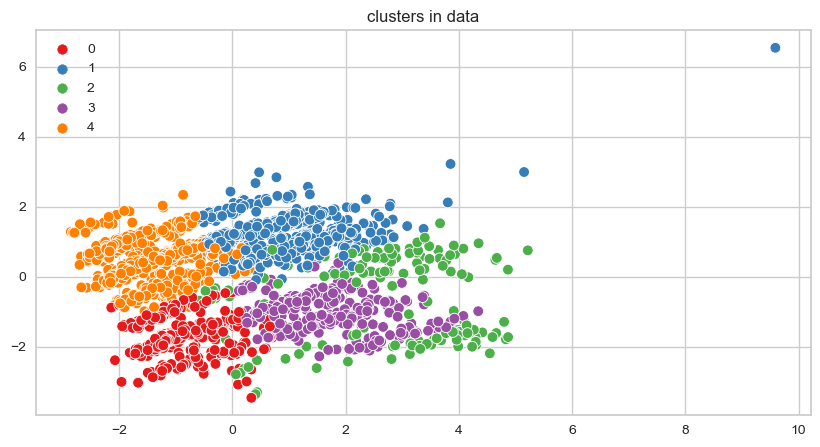

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster,s=60, palette='Set1')
plt.title('clusters in data')

<Axes: ylabel='count'>

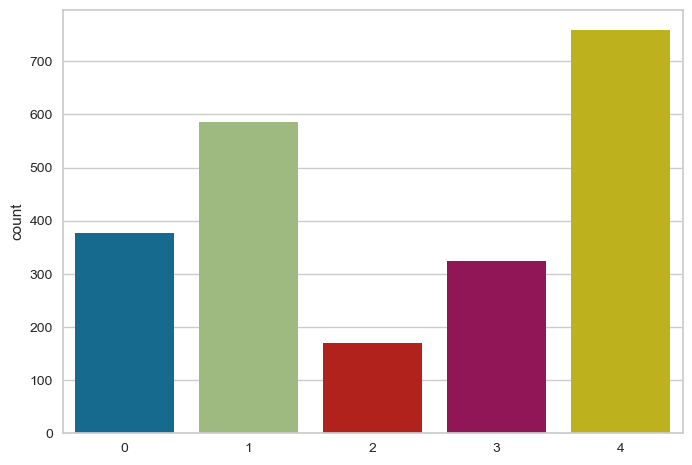

In [71]:
sns.countplot(x=data['cluster'])

# Conclusion

So according to the output and overall analysis conducted on this data science project on customer personality analysis with Python, we can conclude that the biggest customers of wines are:

1. Customers with an average income of around $69,500.
2. Customers with an average total spend of approximately $1,252.
3. Customers registered with the company for approximately 21 months.
4. Customers with a graduate degree.
5. And customers who are also heavy consumers of meat products.
